# Generation of observation from inhomogenous Poisson process

## Algorithm by Lewis and Shedler, 1979

In [1]:
import numpy as np
from Generator import LewisShedler

In [2]:
T = np.pi
n_size = 10000

In [3]:
def lam(t):
    return np.where(t < 1, n_size, n_size*(np.sin(t**2*np.pi)+1)/3)

In [4]:
generator = LewisShedler(lam, T, lambda_hat=n_size)

Maximum of the intensity function: 10000.0


In [5]:
%%timeit 
t = generator.generate()

5.46 ms ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
t = generator.generate()
print('Number of simulated points: {}'.format(len(t)))

Number of simulated points: 16740


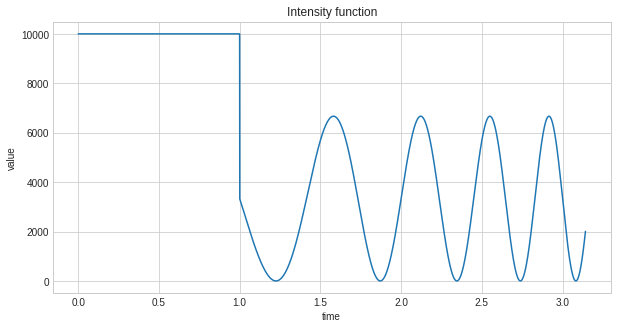

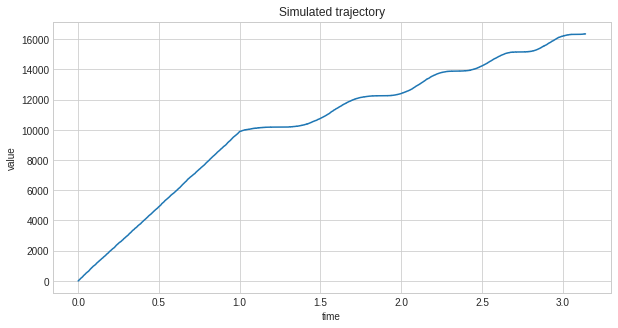

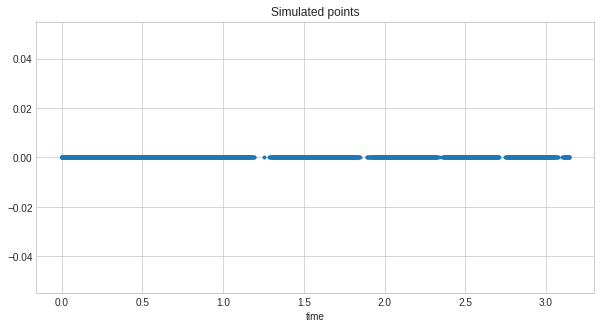

<Figure size 720x360 with 0 Axes>

In [7]:
generator.visualize(save=False)

# Approximation of integral operator

In [8]:
import numpy as np
import dask.array as da
from dask.diagnostics import ProgressBar
from Operator import Operator

In [9]:
def kernel(x, y):
    return np.repeat(1, len(x))

In [10]:
operator = Operator(kernel, 0, 1, 50000, "rectangle")

In [11]:
oper = operator.approximate(compute=False)

approximate ran in 4.647730112075806 s


In [12]:
with ProgressBar():
    oper = operator.K.compute()
oper.shape

[########################################] | 100% Completed |  2min 14.8s


(50000, 50000)

# Estimation of intensity function using Landweber iteration

In [2]:
sample_size = 100

In [3]:
def kernel(x, y):
    return np.where(x < y, 1, 1)

In [4]:
def lam(t):
    return np.where(t<1, sample_size, sample_size)

In [5]:
from Generator import LewisShedler
generator = LewisShedler(lam, 1)
obs = generator.generate()

Maximum of the intensity function: 100


In [6]:
from Estimators import Landweber

In [7]:
landwerber = Landweber(kernel, 0, 1, 500, obs, sample_size, 'rectangle', relaxation=0.05, max_iter=200)

approximate ran in 0.052564382553100586 s


/home/grzegorz/anaconda3/envs/poisson/lib/python3.6/site-packages/dask/array/routines.py:319: PerformanceWarning: Increasing number of chunks by factor of 500
  concatenate=True,


In [8]:
landwerber.observations = generator.generate()
landwerber.refresh()
landwerber.observations

array([0.        , 0.00961526, 0.02673414, 0.02741603, 0.02843627,
       0.03328026, 0.03922138, 0.04163136, 0.04181656, 0.04297119,
       0.05982037, 0.07592704, 0.07733641, 0.08939777, 0.09242669,
       0.09904941, 0.1047964 , 0.12633806, 0.127347  , 0.12870941,
       0.13229169, 0.14254775, 0.15476734, 0.15879883, 0.16350172,
       0.17192789, 0.17797087, 0.17918835, 0.18088135, 0.1816875 ,
       0.18240499, 0.18690037, 0.18690245, 0.19495891, 0.2058357 ,
       0.20822961, 0.22023103, 0.24281642, 0.25525117, 0.25681023,
       0.2583132 , 0.25958806, 0.26001225, 0.26501022, 0.26986543,
       0.28395002, 0.29510286, 0.31973911, 0.3207511 , 0.35635306,
       0.35839517, 0.36059288, 0.36428937, 0.36660746, 0.36763006,
       0.37957154, 0.38194191, 0.39242569, 0.39556121, 0.40448207,
       0.41229497, 0.41495055, 0.4246742 , 0.45689322, 0.46046158,
       0.46254522, 0.4775375 , 0.48429401, 0.49364669, 0.49680245,
       0.51018661, 0.53647321, 0.55526921, 0.55889314, 0.57108

In [9]:
landwerber.q_estimator.compute()

array([1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26,
       1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26,
       1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26,
       1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26,
       1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26,
       1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26,
       1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26,
       1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26,
       1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26,
       1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26,
       1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26,
       1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26,
       1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26,
       1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.

In [10]:
landwerber.delta.compute()

0.012600000000000005

In [ ]:
landwerber.estimate(compute=True)

Force computations...
[###                                     ] | 8% Completed |  2min 10.3s

In [ ]:
landwerber.solution

In [ ]:
landwerber.L2norm(landwerber.solution, np.repeat([1], landwerber.solution.shape[0]), sqrt=True).compute()